In [1]:
# Importar las librerías necesarias
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from google.colab import drive

# Montar Google Drive con el dataset
from google.colab import drive
drive.mount('/content/drive')

# Definir el directorio raíz del dataset en Google Drive
dataset_dir = "/content/drive/MyDrive/GTSRB_Dataset"

# Listar los contenidos de la carpeta raíz del dataset
print("Archivos en la carpeta raíz:")
print(os.listdir(dataset_dir))

# Listar las carpetas y archivos dentro de Train, Test y Meta
train_dir = os.path.join(dataset_dir, "Train")
test_dir = os.path.join(dataset_dir, "Test")
meta_dir = os.path.join(dataset_dir, "Meta")

# Rutas a los archivos CSV
train_csv = os.path.join(dataset_dir, "Train.csv")
test_csv = os.path.join(dataset_dir, "Test.csv")
meta_csv = os.path.join(dataset_dir, "Meta.csv")

# Leer los CSV
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
meta_df = pd.read_csv(meta_csv)

NUM_CATEGORIES = len(os.listdir(train_dir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivos en la carpeta raíz:
['Meta.csv', 'Test.csv', 'Train.csv', 'Test', 'Meta', 'Train']


# Resumir y mostrar las imágenes de entrenamiento

In [2]:
def summarize_train_images():
    train_image_paths = []
    total_train_images = 0

    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        if os.path.isdir(path):
            train_images = os.listdir(path)
            total_train_images += len(train_images)
            train_image_paths.extend([os.path.join(path, img) for img in train_images])
        else:
            print(f"El directorio {path} no existe.")

    print(f"Total de imágenes de entrenamiento: {total_train_images}")

    plt.figure(figsize=(25, 25))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        random_train_img_path = random.choice(train_image_paths)
        train_img = imread(random_train_img_path)
        plt.imshow(train_img)
        plt.grid(False)
        plt.xlabel(f'Width: {train_img.shape[1]}', fontsize=20)
        plt.ylabel(f'Height: {train_img.shape[0]}', fontsize=20)
    plt.show()

Total de imágenes de entrenamiento: 39228


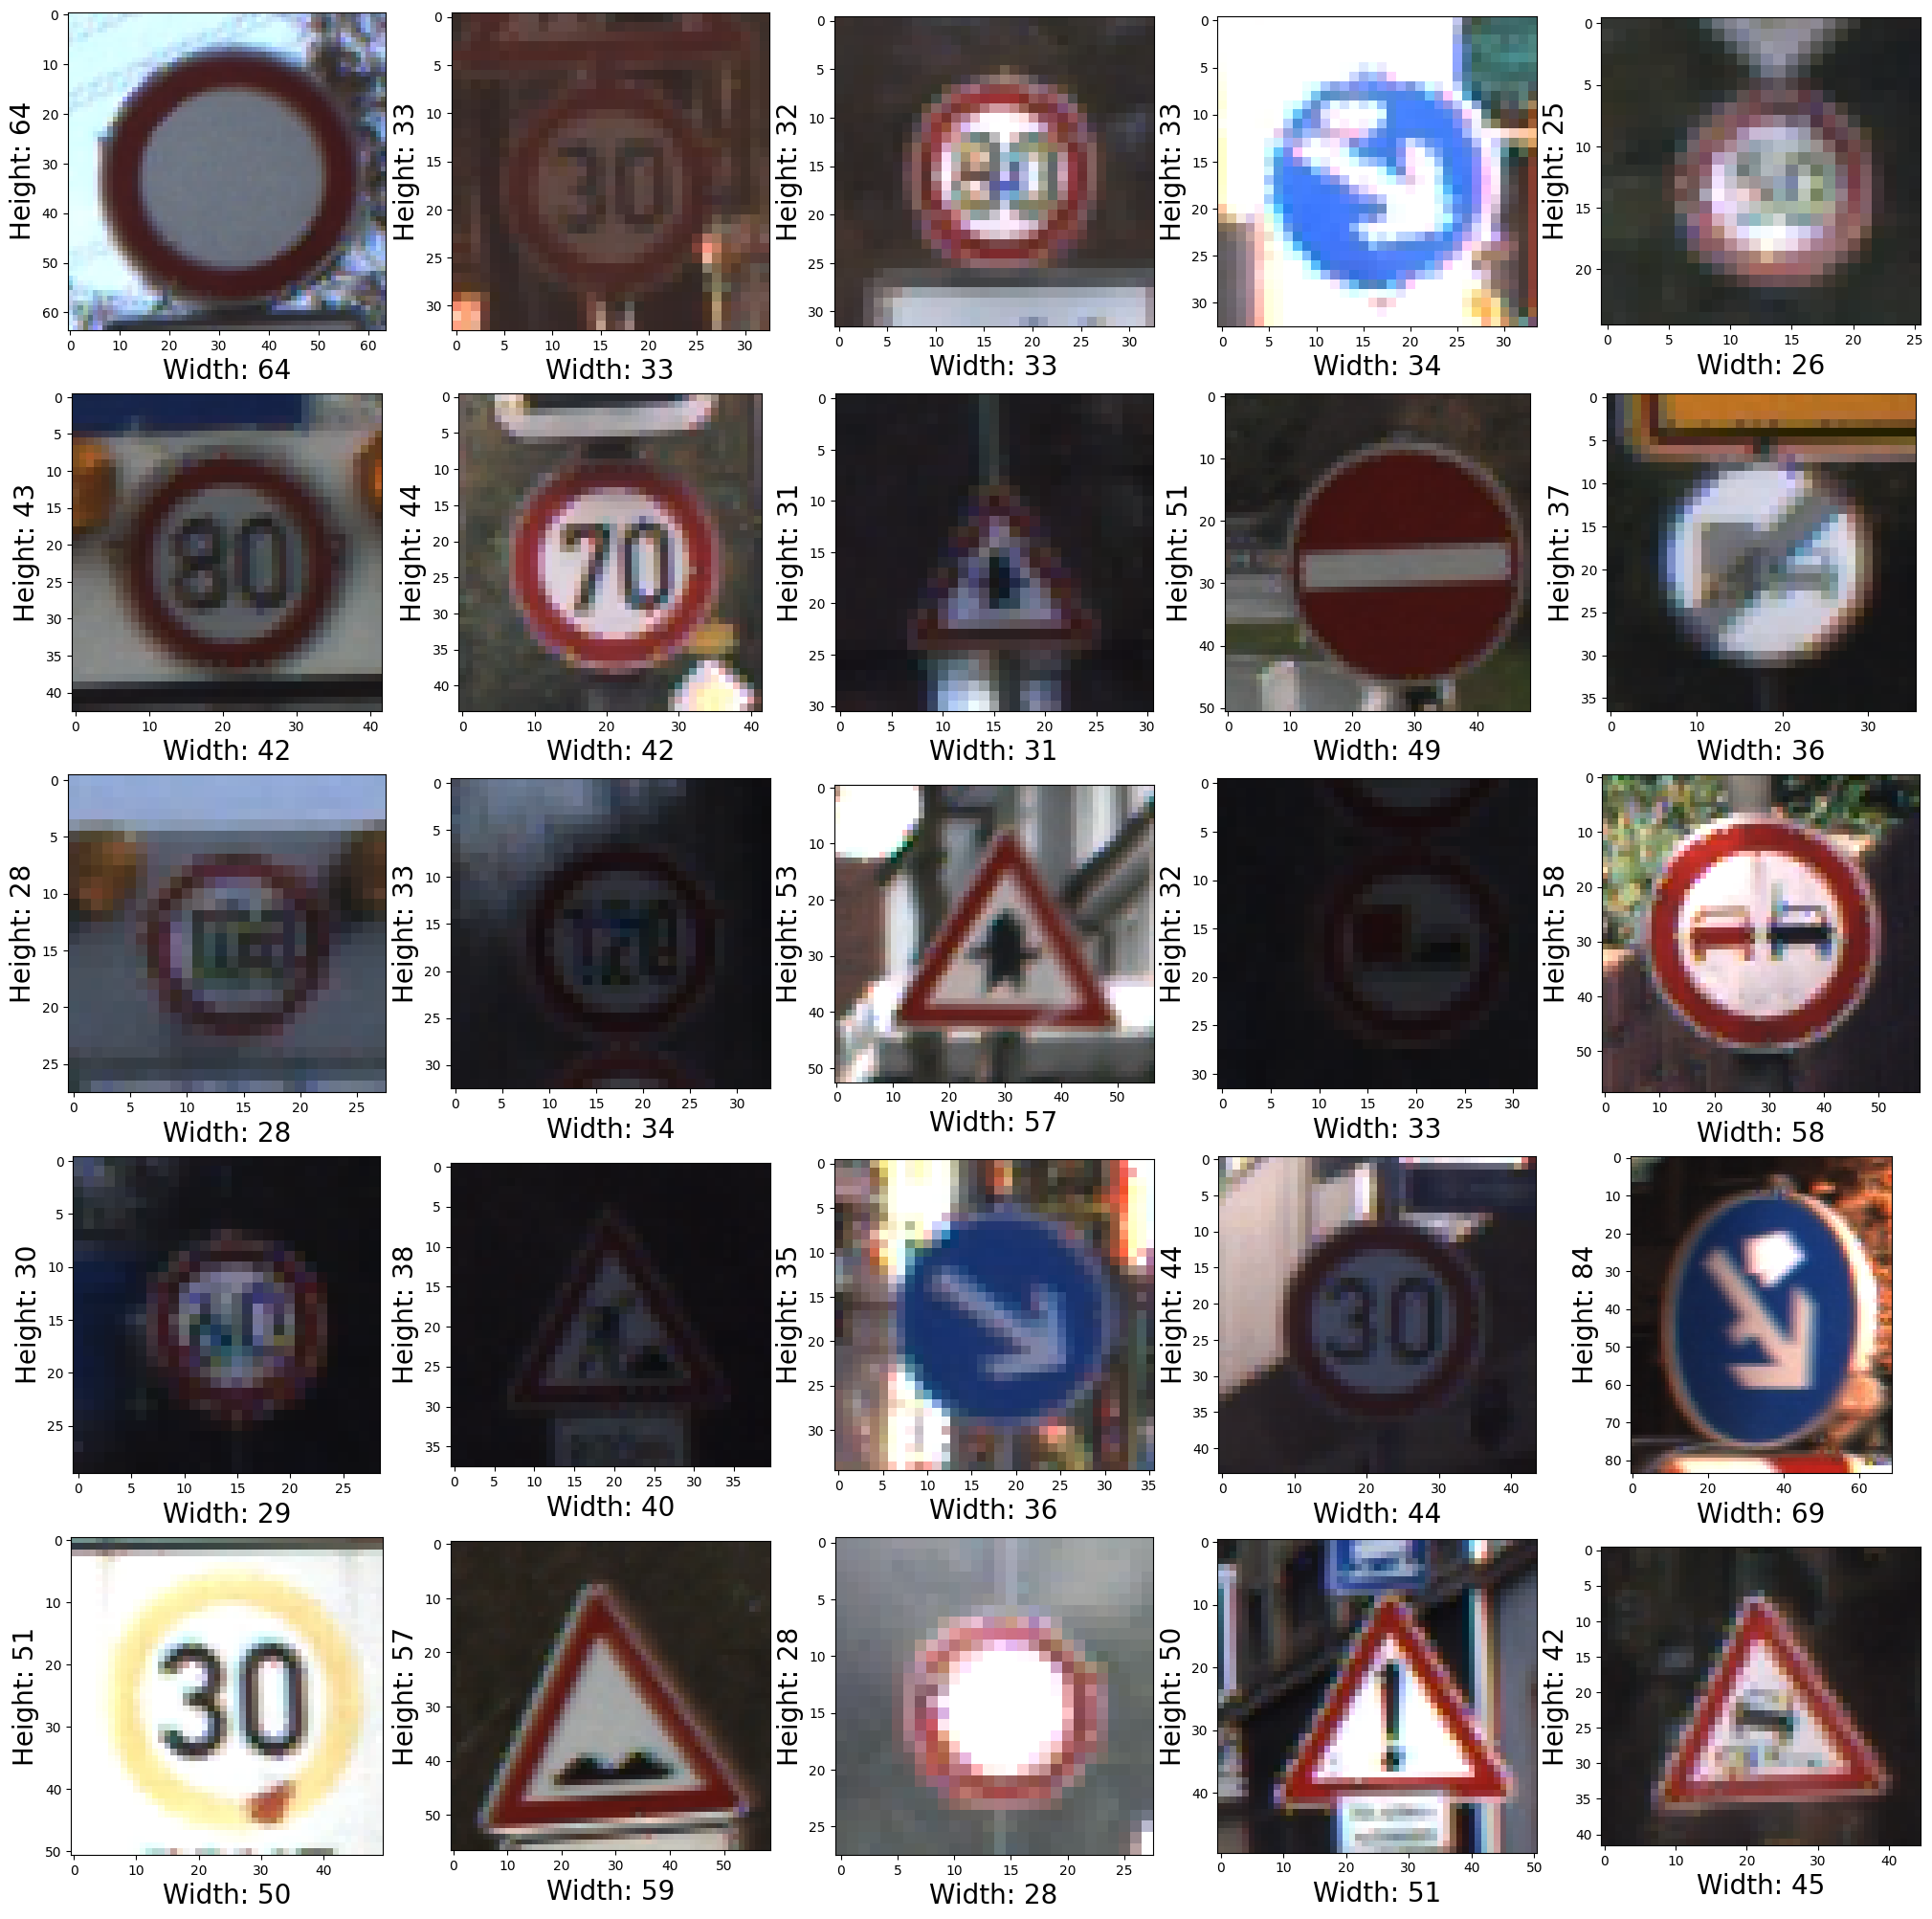

In [3]:
summarize_train_images()

# Eliminar imágenes negras

In [4]:
def detect_and_remove_dark_images(threshold=10):
    dark_images = []
    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        images = os.listdir(path)
        for img in images:
            try:
                image_path = os.path.join(path, img)
                image = cv2.imread(image_path)
                if image is not None:
                    # Convertir la imagen a escala de grises
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # Calcular el brillo promedio de la imagen
                    avg_brightness = np.mean(gray_image)
                    if avg_brightness < threshold:
                        dark_images.append(image_path)
                        os.remove(image_path)  # Eliminar la imagen
                        print(f"Imagen eliminada: {image_path}")
                else:
                    print(f"Error al cargar la imagen {img}")
            except Exception as e:
                print(f"Error al procesar la imagen {img}: {e}")

    print(f"Total de imágenes negras eliminadas: {len(dark_images)}")
    if dark_images:
        print("Imágenes negras eliminadas:")
        for dark_img in dark_images:
            print(dark_img)
    else:
        print("No se encontraron imágenes negras.")


In [5]:
detect_and_remove_dark_images()

Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00007.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00017.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00028.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00008.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00027.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00026.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00006.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00001.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00019.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00027.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00028.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/4/00

# Eliminar imágenes borrosas

In [6]:
def detect_and_remove_blurry_images(threshold=100.0):
    blurry_images = []
    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        images = os.listdir(path)
        for img in images:
            try:
                image_path = os.path.join(path, img)
                image = cv2.imread(image_path)
                if image is not None:
                    # Convertir la imagen a escala de grises
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # Calcular la varianza del Laplaciano
                    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
                    if laplacian_var < threshold:
                        blurry_images.append(image_path)
                        os.remove(image_path)  # Eliminar la imagen
                        print(f"Imagen eliminada: {image_path}")
                else:
                    print(f"Error al cargar la imagen {img}")
            except Exception as e:
                print(f"Error al procesar la imagen {img}: {e}")

    print(f"Total de imágenes borrosas eliminadas: {len(blurry_images)}")
    if blurry_images:
        print("Imágenes borrosas eliminadas:")
        for blurry_img in blurry_images:
            print(blurry_img)
    else:
        print("No se encontraron imágenes borrosas.")


In [7]:
detect_and_remove_blurry_images()

Se han truncado las últimas 5000 líneas del flujo de salida.
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00014.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00003_00017.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00004.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00001.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00005.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00013.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00003.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00003_00020.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00003_00010.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00002_00022.png
Imagen eliminada: /content/drive/MyDrive/GTSRB_Dataset/Train/16/00016_00003_000